# Example 5.1 — Corrosion Time-to-Failure Estimation using LS

**Author:** Justin Ryan  
**Created:** 2025-09-24  
**Updated:** 2025-10-07  
**Version:** 1.1  

---
## Problem Statement
Five specimens of a new corrosion-resistant material are tested for **240 hours** in a highly corrosive environment.
Each specimen has a density of **7.6 g/cm³** and an exposed surface area of **4.3 cm²**. After testing, the weight losses
(in mg) are: 11.1, 10.4, 12.1, 11.4, and 9.8. Assume measurements are accurate and free of error. **Structural failure
occurs if material loss exceeds 1 mm in depth.**
1. Estimate the **time to failure** (in hours) for each specimen.
2. Based on these estimated failure times, identify the **probability distribution that best describes the material's
life** using the ADT pseudo time failure method.

## Method

In [1]:
import numpy as np
import reliability
import matplotlib.pyplot as plt
from reliability.Fitters import Fit_Weibull_2P, Fit_Lognormal_2P

# Mass loss in mg -> convert to kg
mass_loss = np.array([11.1, 10.4, 12.1, 11.4, 9.8]) * 1e-6  # [kg]

# Density and surface area
density = 7.6e3        # [kg/m^3]
surface_area = 4.3e-4  # [m^2]

# Test time
test_time = 240  # [hours]

# Failure Definition (1 mm depth loss)
D_f = 1e-3       # [m]

# Depth loss calculation - ASSUMPTION - lab setup is one exposed face of area. Uniform penetration just moves that face inward; its area remains essentially constant (edge effects negligible).
depth_loss = mass_loss / (density * surface_area)  # [m] after 240h

print("\nDepth loss (mm) after 240h:", np.round(depth_loss * 1e3, 4))

# Depth loss rate
depth_loss_rate = depth_loss / test_time  # [m/h]

print("Depth loss rate (µm/h):", np.round(depth_loss_rate * 1e6, 4))

# Time to failure for each specimen
TTF = D_f / depth_loss_rate  # [h]

print("Time to failure (hours):", np.round(TTF, 1),"\n\n")


Depth loss (mm) after 240h: [0.0034 0.0032 0.0037 0.0035 0.003 ]
Depth loss rate (µm/h): [0.0142 0.0133 0.0154 0.0145 0.0125]
Time to failure (hours): [70659.5 75415.4 64819.8 68800.  80032.7] 




### 1) Estimate the time to failure (in hours) for each specimen  

Using $D_f = 1 \,\text{mm} = 1 \times 10^{-3} \,\text{m}$, the computed times to reach the 1 mm depth are:  

- **Specimen 1:** 70,659.5 h (~8.07 yr)  
- **Specimen 2:** 75,415.4 h (~8.61 yr)  
- **Specimen 3:** 64,819.8 h (~7.40 yr)  
- **Specimen 4:** 68,800.0 h (~7.85 yr)  
- **Specimen 5:** 80,032.7 h (~9.14 yr)

---

### TTF Probability distribution fit

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.


Results from Fit_Weibull_2P (95% CI):
Analysis method: Least Squares Estimation (RRX)
Failures / Right censored: 5/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha           74524         2708.96   69399.3   80027.2
     Beta          12.954         4.57312    6.4849   25.8762 

Goodness of fit    Value
 Log-likelihood -50.2586
           AICc  110.517
            BIC  103.736
             AD  2.38701 



findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


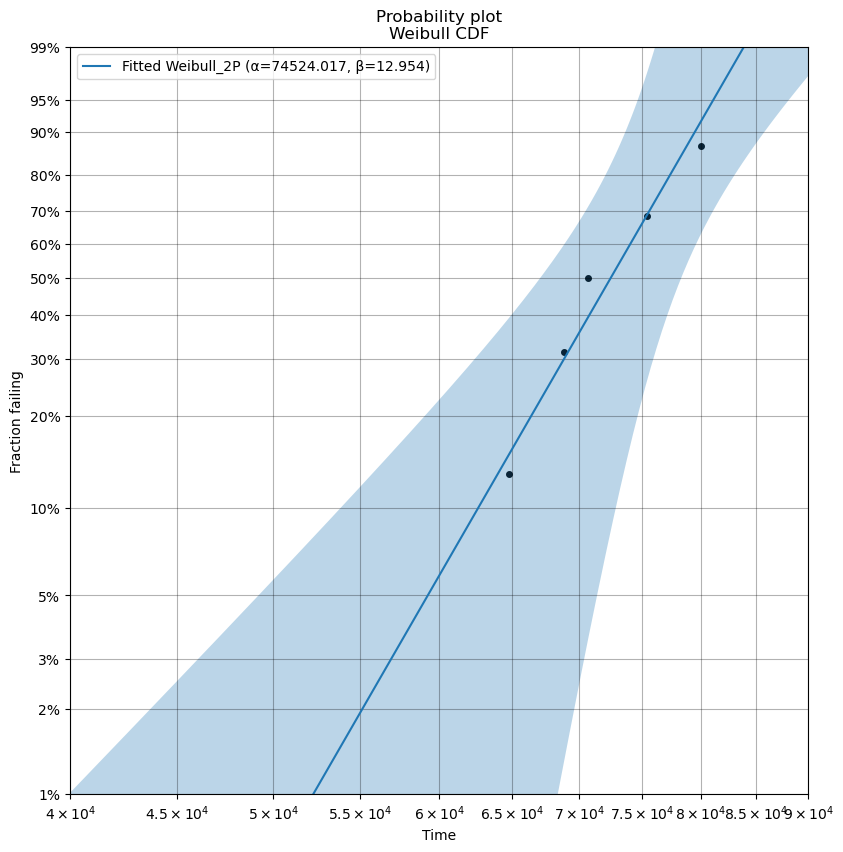

Results from Fit_Lognormal_2P (95% CI):
Analysis method: Least Squares Estimation (RRX)
Failures / Right censored: 5/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu          11.181       0.0419076   11.0988   11.2631
    Sigma       0.0937083       0.0460956 0.0357328  0.245747 

Goodness of fit    Value
 Log-likelihood -50.1839
           AICc  110.368
            BIC  103.587
             AD    2.309 



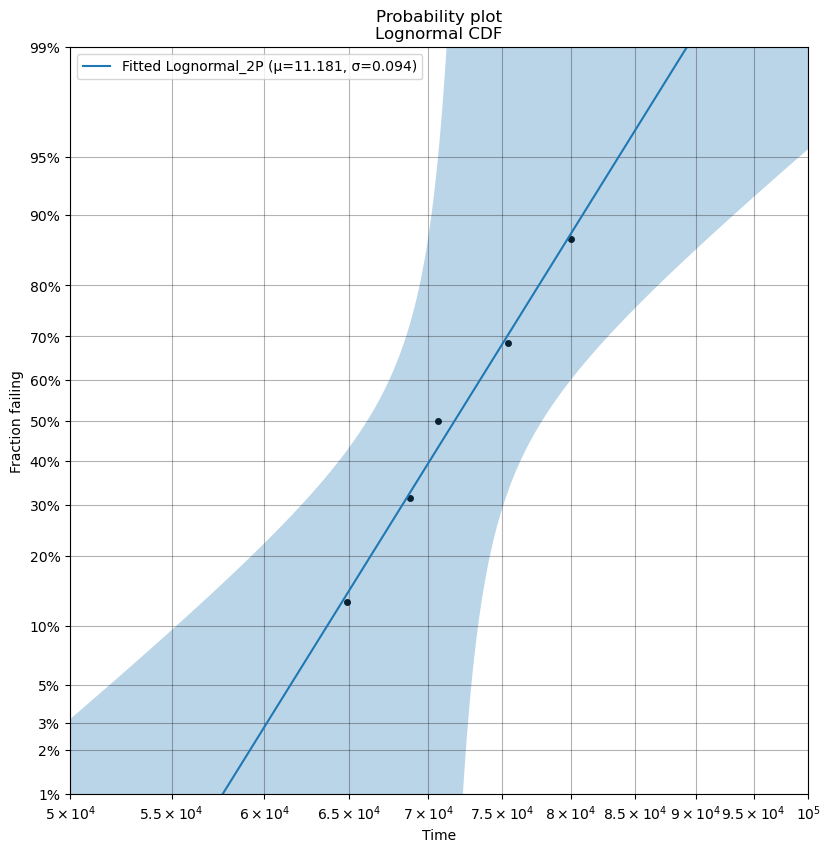

In [2]:
# Weibull parameters and goodness of fit
Fit_Weibull_2P(failures=TTF, method = 'LS')
plt.xlim(4e4,9e4)
plt.ylim(1e-2,0.99)
plt.show()

# Lognormal parameters and goodness of fit
Fit_Lognormal_2P(failures=TTF, method = 'LS')
plt.xlim(5e4,1e5)
plt.ylim(1e-2,0.99)
plt.show()

### 2) Identify the probability distribution (ADT pseudo-time failure method)  

Fitting **Weibull-2P** and **Lognormal-2P** to the pseudo failure times (\(TTF\)) and comparing:  

- **Log-likelihood:** higher is better  
- **AICc / BIC:** lower is better
- **Anderson–Darling (AD):** lower is better  

The **Lognormal distribution** provides a slightly better overall fit across all criteria. 

**Logic Check**: Lognormal distributions often fits corrosion and wear degradation data well as corrosion and material loss are driven by many small, multiplicative factors: micro-environment chemistry, surface roughness, grain boundaries, micro-pitting, localized electrochemical reactions, etc. The product of many random effects tends to follow a lognormal distribution because the log of a product is a sum, and sums of random variables are generally normal by the Central Limit Theorem. ✅

✅ **Conclusion:** The **Lognormal distribution** is the preferred life model for this material.  


In [7]:
import numpy as np
from scipy.stats import weibull_min, lognorm

def _empirical_probs(n, method="bernard"):
    i = np.arange(1, n+1, dtype=float)
    if method.lower().startswith("bern"):
        # Bernard's: (i - 0.3)/(n + 0.4)
        return (i - 0.3) / (n + 0.4)
    elif method.lower().startswith("blom"):
        # Blom's: (i - 0.375)/(n + 0.25)
        return (i - 0.375) / (n + 0.25)
    else:
        # Default: i/(n+1)
        return i / (n + 1.0)

def _gof_metrics(ttf, dist_name, params, ecdf_method="bernard"):
    """
    Compute GOF metrics against the empirical CDF at the sample points.
    - dist_name: "weibull" or "lognormal"
    - params: dict from the fitters below
    Returns dict with SSE_CDF, KS, loglike, AIC, BIC
    """
    x = np.sort(np.asarray(ttf, dtype=float))
    n = x.size
    F_emp = _empirical_probs(n, method=ecdf_method)

    # Model CDF & logpdf at x
    if dist_name == "weibull":
        c = params["shape_beta"]
        scale = params["scale_alpha"]
        F_model = weibull_min.cdf(x, c=c, loc=0.0, scale=scale)
        logpdf = weibull_min.logpdf(x, c=c, loc=0.0, scale=scale)
        k = 2  # shape, scale
    elif dist_name == "lognormal":
        mu = params["mu"]
        sigma = params["sigma"]
        F_model = lognorm.cdf(x, s=sigma, loc=0.0, scale=np.exp(mu))
        logpdf = lognorm.logpdf(x, s=sigma, loc=0.0, scale=np.exp(mu))
        k = 2  # mu, sigma
    else:
        raise ValueError("dist_name must be 'weibull' or 'lognormal'.")

    # Metrics
    sse_cdf = float(np.sum((F_emp - F_model) ** 2))
    ll = float(np.sum(logpdf))
    aic = 2 * k - 2 * ll
    bic = k * np.log(n) - 2 * ll

    return {
        "SSE_CDF": sse_cdf,
        "loglike": ll,
        "AIC": aic,
        "BIC": bic,
        "n": n,
        "ecdf": ecdf_method,
    }

def fit_parametric_ttf(N_fail_draws, ecdf_method="bernard"):
    """
    Fit Weibull and Lognormal to simulated TTF samples and return
    parameters + GOF metrics (SSE_CDF, KS, loglike, AIC, BIC).
    """
    x = np.asarray(N_fail_draws, dtype=float)
    x = x[np.isfinite(x) & (x > 0)]
    if x.size < 5:
        raise ValueError("Not enough valid TTF samples to fit distributions.")

    # Weibull fit (loc=0)
    c, loc_w, scale_w = weibull_min.fit(x, floc=0.0)
    w_params = {"shape_beta": c, "scale_alpha": scale_w}
    w_gof = _gof_metrics(x, "weibull", w_params, ecdf_method=ecdf_method)
    w_params.update(w_gof)

    # Lognormal fit (loc=0)
    s, loc_l, scale_l = lognorm.fit(x, floc=0.0)
    l_params = {"mu": float(np.log(scale_l)), "sigma": float(s)}
    l_gof = _gof_metrics(x, "lognormal", l_params, ecdf_method=ecdf_method)
    l_params.update(l_gof)

    return w_params, l_params


In [8]:
wbl, lgn = fit_parametric_ttf(TTF, ecdf_method="blom")

# Determine winner and loser by SSE_CDF
if wbl["SSE_CDF"] < lgn["SSE_CDF"]:
    winner_name, winner_params, winner_sse = "Weibull", wbl, wbl["SSE_CDF"]
    loser_name, loser_sse = "Lognormal", lgn["SSE_CDF"]
    param_text = f"β={winner_params['shape_beta']:.4g}, α={winner_params['scale_alpha']:.4g}"
else:
    winner_name, winner_params, winner_sse = "Lognormal", lgn, lgn["SSE_CDF"]
    loser_name, loser_sse = "Weibull", wbl["SSE_CDF"]
    param_text = f"μ={winner_params['mu']:.4g}, σ={winner_params['sigma']:.4g}"

# Print concise comparison
print(f"{winner_name} fit selected (lower SSE_CDF).")
print(f"  Parameters: {param_text}")
print(f"  SSE_CDF = {winner_sse:.6g}")
print(f"Compared to {loser_name} (SSE_CDF = {loser_sse:.6g})")



Lognormal fit selected (lower SSE_CDF).
  Parameters: μ=11.18, σ=0.07312
  SSE_CDF = 0.0154135
Compared to Weibull (SSE_CDF = 0.0221578)
